In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
clas6_all = pd.read_csv('clas6/clas6_all.txt')
clas6_all.head()

,Q2,x,z,pT2,phi,data_xs,data_xs_err,data_xs_sys,data_xs_RC,tra_bnxs,...,1.033800E-02,3.383000E-03,2.880000E-02,1.143700E+00,0.000000E+00,0.000000E+00.1,0.000000E+00.2,0.000000E+00.3,0.000000E+00.4,0.000000E+00.5
0,1.49,0.1468,0.0682,0.0049,190.0,0.010447,0.003276,0.029105,1.1437,0.000513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.49,0.1468,0.0682,0.0259,10.0,0.007477,0.000581,0.000945,1.0944,0.000466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.49,0.1468,0.0682,0.0259,30.0,0.007098,0.001826,0.000896,1.1008,0.000461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.49,0.1468,0.0682,0.0259,50.0,0.006618,0.000392,0.000835,1.1139,0.000458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.49,0.1468,0.0682,0.0259,70.0,0.006758,0.000644,0.000852,1.1340,0.000459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print('Q2',clas6_all['Q2'].unique())
print('x',clas6_all['x'].unique())
print('z',clas6_all['z'].unique())
print('pT2',clas6_all['pT2'].unique())

Q2 [1.49 1.74 2.02 2.37 2.93 3.42 4.1  4.85 5.72 6.61]
x [0.1468 0.1753 0.2051 0.2362 0.2686 0.3025 0.3379 0.3748 0.4134 0.4537
 0.4958 0.5397 0.5855 0.6334 0.6834 0.7355 0.79   0.8469 0.9063]
z [0.0682 0.0933 0.1194 0.1468 0.1753 0.2051 0.2362 0.2686 0.3025 0.3379
 0.3748 0.4134 0.4537 0.4958 0.5397 0.5855 0.6334 0.6834 0.7355 0.79
 0.8469 0.9063]
pT2 [0.0049 0.0259 0.0655 0.129  0.2165 0.3402 0.5074 0.7427 1.0741 1.554 ]


In [4]:
Q2_list=clas6_all['Q2'].unique()
x_list=clas6_all['x'].unique()
z_list=clas6_all['z'].unique()
pT2_list=clas6_all['pT2'].unique()
phi_list=clas6_all['phi'].unique()
print('Q2 len ',len(Q2_list),' x len ',len(x_list),' z len ',len(z_list),' pT2 len ',len(pT2_list),' phi len ',len(phi_list))


Q2 len  10  x len  19  z len  22  pT2 len  10  phi len  18


In [5]:
i_Q2,i_x,i_z,i_pT2,i_phi = (5,9,11,5,9)


In [6]:
print('Q2:',Q2_list[i_Q2],' x:',x_list[i_x],' z:',z_list[i_z],' pT2:',pT2_list[i_pT2],' phi:',phi_list[i_phi])

Q2: 3.42  x: 0.4537  z: 0.4134  pT2: 0.3402  phi: 170.0


<ipython-input-9-751571c99dbb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-9-751571c99dbb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
<ipython-input-9-751571c99dbb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]


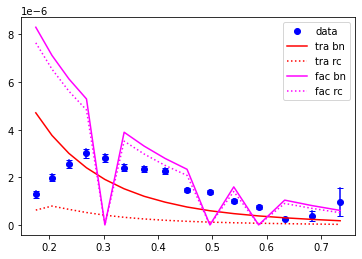

In [9]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
zs = df_z['z'].to_list()
data_xs = df_z['data_xs']
data_xs_err = df_z['data_xs_err']
data_xs_sys = df_z['data_xs_sys']
data_xs_RC = df_z['data_xs_RC']
tra_bn = df_z['tra_bnxs']
tra_rc = df_z['tra_rcxs']
fac_bn = df_z['Fac_bnxs']
fac_rc = df_z['Fac_rcxs']
for i_z in zs:
    xs = df_z[df_z['z']==i_z]['data_xs'].values[0]
    xs_stat_err = df_z[df_z['z']==i_z]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([i_z,i_z],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
plt.plot(zs,data_xs,'bo',label='data')
plt.plot(zs,tra_bn,color='red',label='tra bn')
plt.plot(zs,tra_rc,color='red',linestyle=':',label='tra rc')
plt.plot(zs,0.2*2*5.75*0.938*fac_bn/(2*3.1415),color='magenta',label='fac bn')
plt.plot(zs,0.2*2*5.75*0.938*fac_rc/(2*3.1415),color='magenta',linestyle=':',label='fac rc')
plt.legend()